# Foundational Data

In [24]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

In [38]:
DATA_PATH = Path("../../data")
NO2_DATA_PATH = DATA_PATH / "airpollution"
BOUNDARY_DATA_PATH = DATA_PATH / "boundaries" 
POPULATION_DATA_PATH = DATA_PATH / "population"

In [28]:
dza_adm0 = gpd.read_file(BOUNDARY_DATA_PATH / 'geoBoundaries-DZA-ADM0.geojson')
dza_adm1 = gpd.read_file(BOUNDARY_DATA_PATH / 'DZA_ADM1_gbOpen.geojson')
#dza_adm2 = gpd.read_file(BOUNDARY_DATA_PATH / 'gadm41_DZA_2.json')
dza_adm3 = gpd.read_file(BOUNDARY_DATA_PATH / 'DZA_ADM3_gbOpen.geojson')

In [30]:

dza_adm1_gadm = gpd.read_file(BOUNDARY_DATA_PATH / 'gadm41_DZA_1.json')
dza_adm2_gadm = gpd.read_file(BOUNDARY_DATA_PATH / 'gadm41_DZA_2.json')

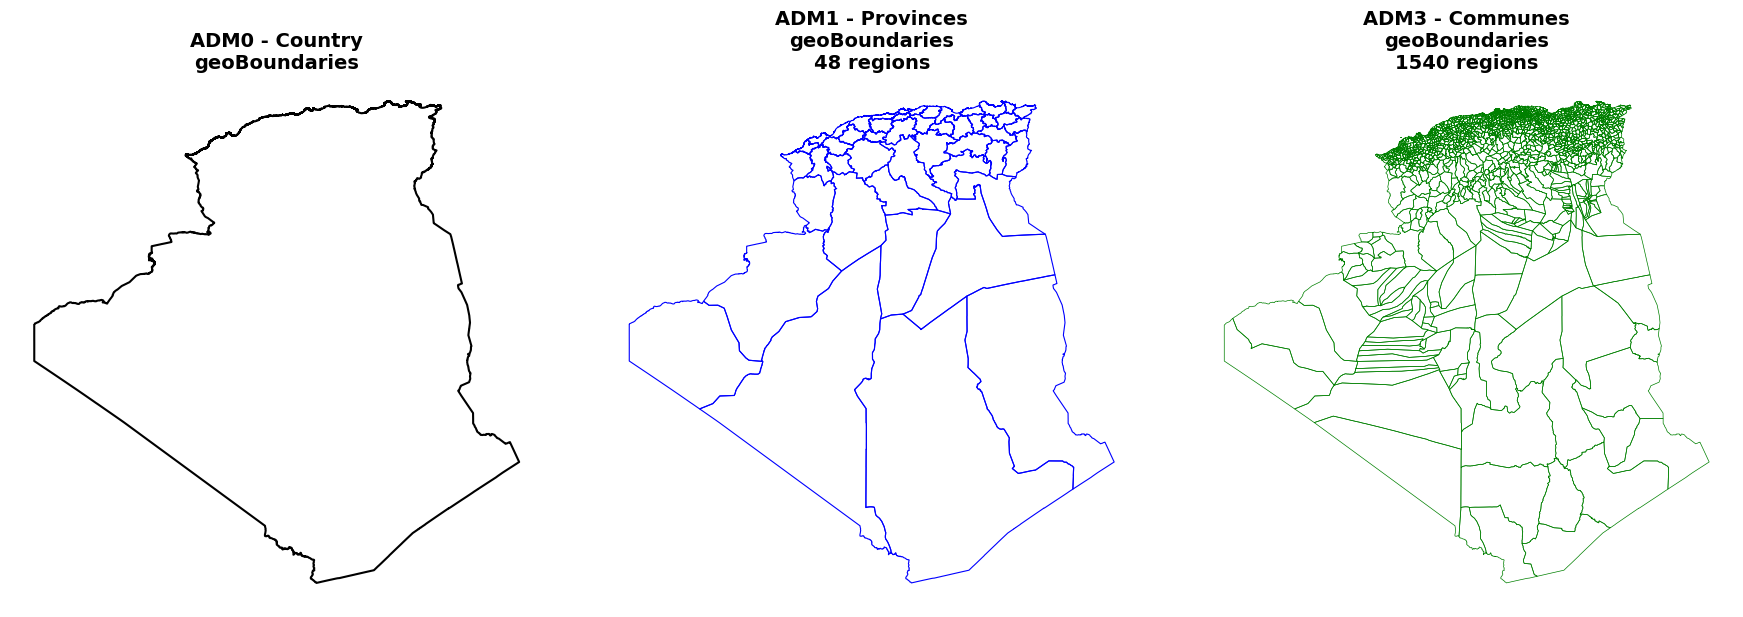

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# ADM0 (Country)
dza_adm0.boundary.plot(ax=ax[0], color='black', linewidth=1.5)
ax[0].set_title('ADM0 - Country\ngeoBoundaries', fontsize=14, fontweight='bold')
ax[0].axis('off')

# ADM1 (Provinces)
dza_adm1.boundary.plot(ax=ax[1], color='blue', linewidth=0.8)
n_adm1 = dza_adm1['shapeName'].nunique()
ax[1].set_title(f'ADM1 - Provinces\ngeoBoundaries\n{n_adm1} regions', fontsize=14, fontweight='bold')
ax[1].axis('off')

# ADM3 (Communes)
dza_adm3.boundary.plot(ax=ax[2], color='green', linewidth=0.5)
n_adm3 = dza_adm3['shapeID'].nunique()
ax[2].set_title(f'ADM3 - Communes\ngeoBoundaries\n{n_adm3} regions', fontsize=14, fontweight='bold')
ax[2].axis('off')

plt.tight_layout()
plt.show()

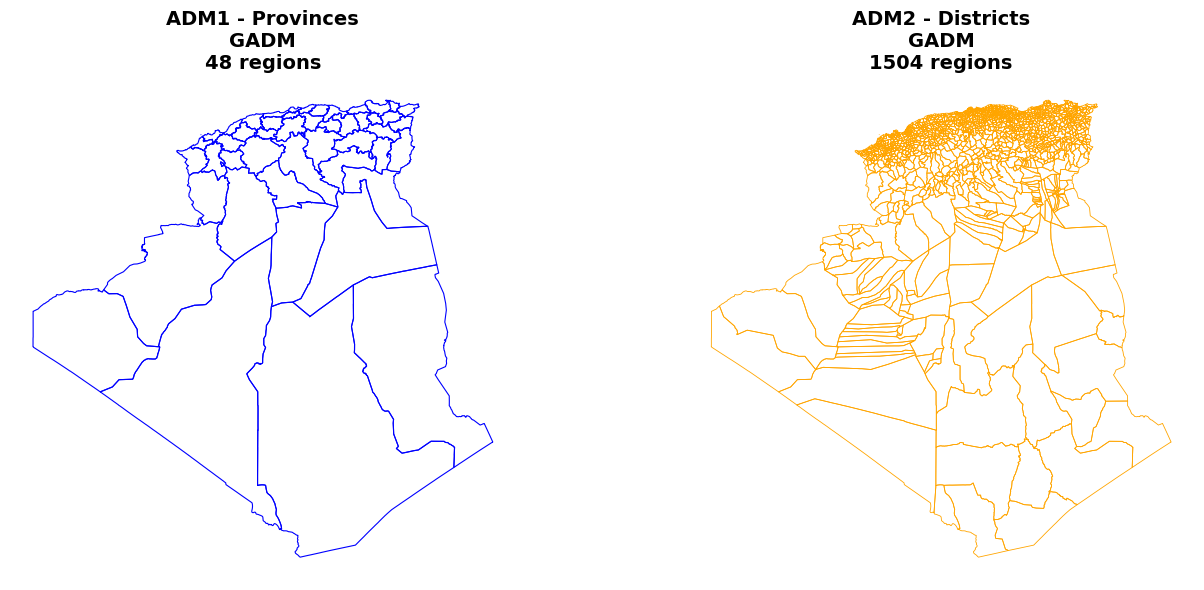

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# ADM1 from GADM
dza_adm1_gadm.boundary.plot(ax=ax[0], color='blue', linewidth=0.8)
n_adm1_gadm = dza_adm1_gadm['GID_1'].nunique()
ax[0].set_title(f'ADM1 - Provinces\nGADM\n{n_adm1_gadm} regions', fontsize=14, fontweight='bold')
ax[0].axis('off')

# ADM2 from GADM
dza_adm2_gadm.boundary.plot(ax=ax[1], color='orange', linewidth=0.6)
n_adm2_gadm = dza_adm2_gadm['GID_2'].nunique()
ax[1].set_title(f'ADM2 - Districts\nGADM\n{n_adm2_gadm} regions', fontsize=14, fontweight='bold')
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [42]:
population_official = pd.read_excel(POPULATION_DATA_PATH / 'Labor Population DZA .xlsx')

In [48]:
import rasterio
import glob
import numpy as np

# Get all TIF files in the worldpop folder
worldpop_folder = POPULATION_DATA_PATH / 'worldpop_DZA_100m_20102025'
tif_files = sorted(glob.glob(str(worldpop_folder / '*.tif')))

print(f"Found {len(tif_files)} TIF files")

# Process each file and calculate sum
results = []

for tif_file in tif_files:
    # Extract year from filename (assuming format contains year)
    filename = Path(tif_file).name
    
    # Read the raster
    with rasterio.open(tif_file) as src:
        # Read the data
        data = src.read(1)  # Read first band
        
        # Replace nodata values with NaN
        nodata = src.nodata
        if nodata is not None:
            data = np.where(data == nodata, np.nan, data)
        
        # Calculate sum (ignoring NaN values)
        total_population = np.nansum(data)
        
        # Get metadata
        bounds = src.bounds
        crs = src.crs
        
    results.append({
        'filename': filename,
        'total_population': total_population,
        'year': filename.split('_')[0] if '_' in filename else 'unknown'  # Adjust based on actual filename pattern
    })
    
    print(f"✓ {filename}: {total_population:,.0f}")

# Create DataFrame
worldpop_summary = pd.DataFrame(results)

print(f"\n📊 Summary:")
print(worldpop_summary)

Found 11 TIF files
✓ dza_pop_2015_CN_100m_R2025A_v1.tif: 39,609,816
✓ dza_pop_2016_CN_100m_R2025A_v1.tif: 40,429,244
✓ dza_pop_2017_CN_100m_R2025A_v1.tif: 41,272,204
✓ dza_pop_2018_CN_100m_R2025A_v1.tif: 42,106,400
✓ dza_pop_2019_CN_100m_R2025A_v1.tif: 42,903,668
✓ dza_pop_2020_CN_100m_R2025A_v1.tif: 43,685,420
✓ dza_pop_2021_CN_100m_R2025A_v1.tif: 44,398,760
✓ dza_pop_2022_CN_100m_R2025A_v1.tif: 45,123,436
✓ dza_pop_2023_CN_100m_R2025A_v1.tif: 45,831,344
✓ dza_pop_2024_CN_100m_R2025A_v1.tif: 46,497,096
✓ dza_pop_2025_CN_100m_R2025A_v1.tif: 47,131,520

📊 Summary:
                              filename  total_population year
0   dza_pop_2015_CN_100m_R2025A_v1.tif        39609816.0  dza
1   dza_pop_2016_CN_100m_R2025A_v1.tif        40429244.0  dza
2   dza_pop_2017_CN_100m_R2025A_v1.tif        41272204.0  dza
3   dza_pop_2018_CN_100m_R2025A_v1.tif        42106400.0  dza
4   dza_pop_2019_CN_100m_R2025A_v1.tif        42903668.0  dza
5   dza_pop_2020_CN_100m_R2025A_v1.tif        43685420.0  

In [54]:
# Display the summary dataframe
worldpop_summary

,filename,total_population,year
0,dza_pop_2015_CN_100m_R2025A_v1.tif,39609816.0,dza
1,dza_pop_2016_CN_100m_R2025A_v1.tif,40429244.0,dza
2,dza_pop_2017_CN_100m_R2025A_v1.tif,41272204.0,dza
3,dza_pop_2018_CN_100m_R2025A_v1.tif,42106400.0,dza
4,dza_pop_2019_CN_100m_R2025A_v1.tif,42903668.0,dza
5,dza_pop_2020_CN_100m_R2025A_v1.tif,43685420.0,dza
6,dza_pop_2021_CN_100m_R2025A_v1.tif,44398760.0,dza
7,dza_pop_2022_CN_100m_R2025A_v1.tif,45123436.0,dza
8,dza_pop_2023_CN_100m_R2025A_v1.tif,45831344.0,dza
9,dza_pop_2024_CN_100m_R2025A_v1.tif,46497096.0,dza


In [52]:
population_official.drop(columns=['Unnamed: 1',
                                'Unnamed: 2',
                                'Unnamed: 3',
                                'Unnamed: 4',
                                'Unnamed: 5',
                                'Unnamed: 6',], inplace=True)

In [56]:
population_official= population_official[population_official['Population by age group (thousands)']=='Population, total (mid-year)']

In [62]:
# Convert from wide to long format
population_long = population_official.melt(
    id_vars=['Population by age group (thousands)'],
    var_name='Year',
    value_name='Population'
)

# Clean up the result
population_long = population_long.rename(columns={'Population by age group (thousands)': 'Category'})
population_long['Year'] = population_long['Year'].astype(int)
population_long['Population'] = pd.to_numeric(population_long['Population'], errors='coerce')

# Display result
population_long = population_long[['Year', 'Population']]

In [63]:
population_long['Population'] = population_long['Population'] * 1000  
population_long.rename(columns={'Population': 'official_population', 'Year':'year'}, inplace=True)

In [ ]:
worldpop_summary['year'] = worldpop_summary['filename'].apply(lambda x: x.split('_')[2])
worldpop_summary['year'] = worldpop_summary['year'].astype(int)

In [ ]:
pop = population_long.merge(worldpop_summary, on='year', how='right')

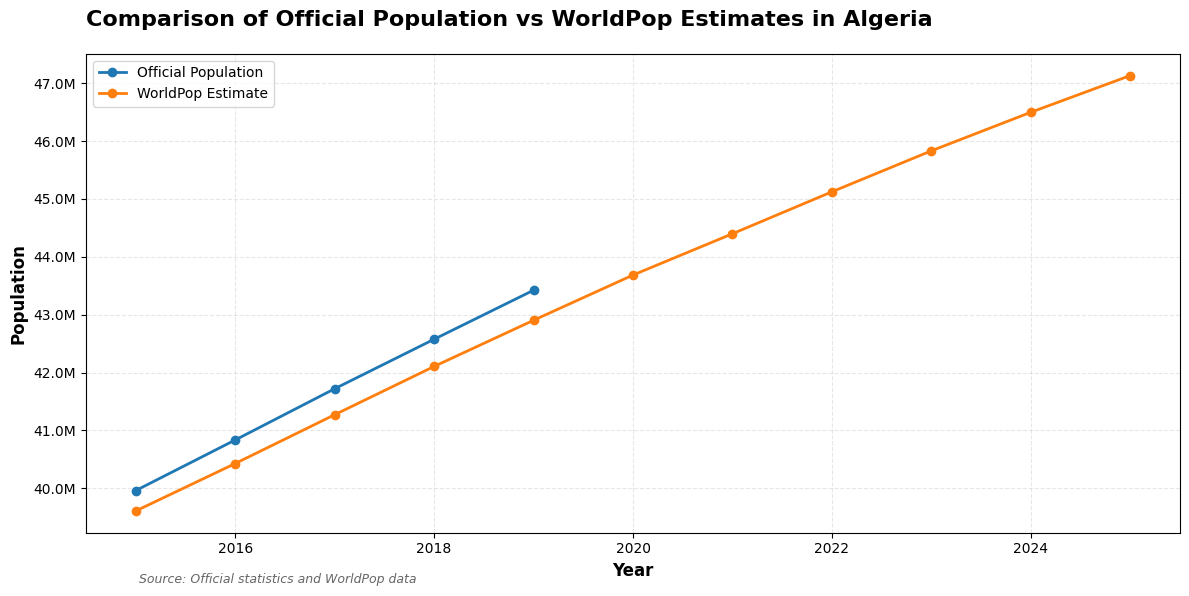

In [90]:

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
pop.plot(x='year', y=['official_population', 'total_population'], 
         kind='line', marker='o', ax=ax, linewidth=2, markersize=6)

# Add title and labels
ax.set_title('Comparison of Official Population vs WorldPop Estimates in Algeria', 
             fontsize=16, fontweight='bold', pad=20, loc='left')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Population', fontsize=12, fontweight='bold')

# Format y-axis to show population in millions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Improve legend
ax.legend(['Official Population', 'WorldPop Estimate'], 
          loc='best', frameon=True, fontsize=10)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Add source note
fig.text(0.12, 0.02, 'Source: Official statistics and WorldPop data', 
         fontsize=9, style='italic', color='#666666')

plt.tight_layout()

plt.show()